In [6]:
import pandas as pd
import numpy as np

**Import Data**

In [ ]:
from braininvaders2015a.dataset import BrainInvaders2015a

In [2]:
dataset = BrainInvaders2015a()

In [3]:
data_subject1 = dataset._get_single_subject_data(3)

In [8]:
# convert data to pandas dataframe
data_ses1_run1 = data_subject1['session_1']['run_1']
data_ses1_run1_pd = data_ses1_run1.to_data_frame()

#Before drop columns 'time'
print("Type: ",type(data_ses1_run1_pd))
print("Shape: ",data_ses1_run1_pd.shape)     #(132160, 34)
print("Column: ",data_ses1_run1_pd.columns)
data_ses1_run1_pd.head()

Type:  <class 'pandas.core.frame.DataFrame'>
Shape:  (132160, 34)
Column:  Index(['time', 'Fp1', 'Fp2', 'AFz', 'F7', 'F3', 'F4', 'F8', 'FC5', 'FC1',
       'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6',
       'P7', 'P3', 'Pz', 'P4', 'P8', 'PO7', 'O1', 'Oz', 'O2', 'PO8', 'PO9',
       'PO10', 'STI 014'],
      dtype='object')


,time,Fp1,Fp2,AFz,F7,F3,F4,F8,FC5,FC1,...,P4,P8,PO7,O1,Oz,O2,PO8,PO9,PO10,STI 014
0,0,3.157185e+10,5.265230e+10,5.149754e+09,4.387759e+10,5.568313e+10,3.471077e+10,3.117607e+10,2.620619e+10,3.173653e+10,...,3.636074e+10,3.945217e+10,3.417484e+10,-4.294688e+11,3.553493e+10,5.279227e+10,3.941691e+10,3.590134e+10,4.241734e+10,0.0
1,2,3.158050e+10,5.265413e+10,5.159794e+09,4.389018e+10,5.569277e+10,3.471438e+10,3.117153e+10,2.621709e+10,3.174507e+10,...,3.636389e+10,3.945638e+10,3.419212e+10,-4.295219e+11,3.554009e+10,5.278923e+10,3.940804e+10,3.592172e+10,4.241554e+10,0.0
2,4,3.157249e+10,5.265439e+10,5.151736e+09,4.386729e+10,5.568120e+10,3.470966e+10,3.116880e+10,2.619198e+10,3.174006e+10,...,3.636807e+10,3.947005e+10,3.419402e+10,-4.298047e+11,3.554363e+10,5.279102e+10,3.941541e+10,3.592000e+10,4.242255e+10,0.0
3,6,3.158542e+10,5.268087e+10,5.171959e+09,4.387886e+10,5.570195e+10,3.473075e+10,3.118782e+10,2.621180e+10,3.175924e+10,...,3.638112e+10,3.947254e+10,3.420238e+10,-4.296819e+11,3.555866e+10,5.281121e+10,3.944047e+10,3.593038e+10,4.243464e+10,0.0
4,8,3.156366e+10,5.265479e+10,5.154078e+09,4.386488e+10,5.568862e+10,3.470948e+10,3.115605e+10,2.620460e+10,3.174185e+10,...,3.636750e+10,3.945868e+10,3.417162e+10,-4.296398e+11,3.554200e+10,5.280414e+10,3.943354e+10,3.588370e+10,4.243328e+10,0.0


**EEG**

Read a generic (built-in) montage.

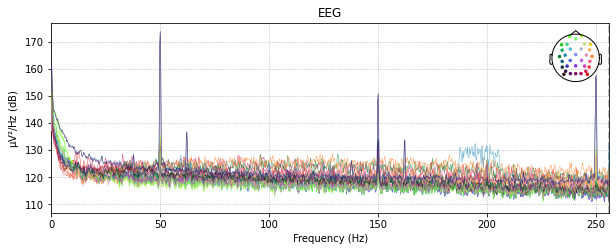

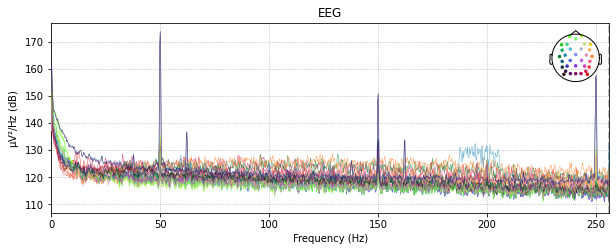

In [10]:
import mne
from mne import create_info
from mne.io import RawArray

ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')     #'standard_1020' -> Electrodes are named and positioned according to the international 10-20 system
data_ses1_run1.set_montage(ten_twenty_montage)
data_ses1_run1.plot_psd()

In [14]:
#Drop columns 'time'
# data_ses1_run1_pd = data_ses1_run1_pd.drop(['time'],axis = 1)

print(data_ses1_run1_pd.groupby('STI 014').nunique())

#After drop columns 'time'
print("Shape: ",data_ses1_run1_pd.shape)     #(132160, 33)
print("Column: ",data_ses1_run1_pd.columns)
data_ses1_run1_pd.head()

            Fp1     Fp2     AFz      F7      F3     F4      F8     FC5  \
STI 014                                                                  
0.0      107890  106502  130724  120485  106773  84722  113992  126561   
1.0         300     300     300     300     300    300     300     300   
2.0          60      60      60      60      60     60      60      60   

            FC1     FC2  ...      Pz     P4     P8    PO7     O1     Oz  \
STI 014                  ...                                              
0.0      125333  130129  ...  115868  66833  97552  96167  73816  77025   
1.0         300     300  ...     300    300    300    300    300    299   
2.0          60      60  ...      60     60     60     60     60     60   

             O2    PO8    PO9    PO10  
STI 014                                
0.0      115798  70952  77700  117037  
1.0         300    300    300     300  
2.0          60     60     60      60  

[3 rows x 32 columns]
Shape:  (132160, 33)
Column:  

,Fp1,Fp2,AFz,F7,F3,F4,F8,FC5,FC1,FC2,...,P4,P8,PO7,O1,Oz,O2,PO8,PO9,PO10,STI 014
0,3.157185e+10,5.265230e+10,5.149754e+09,4.387759e+10,5.568313e+10,3.471077e+10,3.117607e+10,2.620619e+10,3.173653e+10,4.075326e+09,...,3.636074e+10,3.945217e+10,3.417484e+10,-4.294688e+11,3.553493e+10,5.279227e+10,3.941691e+10,3.590134e+10,4.241734e+10,0.0
1,3.158050e+10,5.265413e+10,5.159794e+09,4.389018e+10,5.569277e+10,3.471438e+10,3.117153e+10,2.621709e+10,3.174507e+10,4.179489e+09,...,3.636389e+10,3.945638e+10,3.419212e+10,-4.295219e+11,3.554009e+10,5.278923e+10,3.940804e+10,3.592172e+10,4.241554e+10,0.0
2,3.157249e+10,5.265439e+10,5.151736e+09,4.386729e+10,5.568120e+10,3.470966e+10,3.116880e+10,2.619198e+10,3.174006e+10,4.057206e+09,...,3.636807e+10,3.947005e+10,3.419402e+10,-4.298047e+11,3.554363e+10,5.279102e+10,3.941541e+10,3.592000e+10,4.242255e+10,0.0
3,3.158542e+10,5.268087e+10,5.171959e+09,4.387886e+10,5.570195e+10,3.473075e+10,3.118782e+10,2.621180e+10,3.175924e+10,4.319930e+09,...,3.638112e+10,3.947254e+10,3.420238e+10,-4.296819e+11,3.555866e+10,5.281121e+10,3.944047e+10,3.593038e+10,4.243464e+10,0.0
4,3.156366e+10,5.265479e+10,5.154078e+09,4.386488e+10,5.568862e+10,3.470948e+10,3.115605e+10,2.620460e+10,3.174185e+10,4.366879e+09,...,3.636750e+10,3.945868e+10,3.417162e+10,-4.296398e+11,3.554200e+10,5.280414e+10,3.943354e+10,3.588370e+10,4.243328e+10,0.0


**Transform df to raw mne**

In [15]:
def df_to_raw(df):
    sfreq = 512
    ch_names = list(df.columns)
    ch_types = ['eeg'] * (len(df.columns) - 1) + ['stim']
    ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

    df = df.T
      #mne looks at the tranpose() format
    df[:-1] *= 1e-6
      #convert from uVolts to Volts (mne assumes Volts data)

    info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)

    raw = mne.io.RawArray(df, info)
    raw.set_montage(ten_twenty_montage)

    #try plotting the raw data of its power spectral density
    raw.plot_psd()

    return raw

Creating RawArray with float64 data, n_channels=33, n_times=132160
    Range : 0 ... 132159 =      0.000 ...   258.123 secs
Ready.
Effective window size : 4.000 (s)


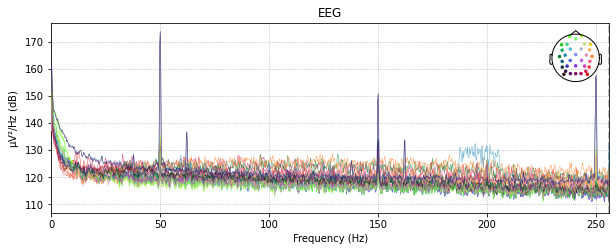

In [16]:
raw = df_to_raw(data_ses1_run1_pd)

**Power line noise**

Some artifacts are restricted to certain frequencies and can therefore be fixed by filtering. An artifact that typically affects only some frequencies is due to the power line.

Power-line noise is a noise created by the electrical network. It is composed of sharp peaks at 50Hz (or 60Hz depending on your geographical location). Some peaks may also be present at the harmonic frequencies, i.e. the integer multiples of the power-line frequency, e.g. 100Hz, 150Hz, … (or 120Hz, 180Hz, …).

Remove the 50Hz power line noise in Thailand. We will also be remove its harmonics, i.e., 100Hz, 150Hz, etc.

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3381 samples (6.604 sec)

Effective window size : 4.000 (s)


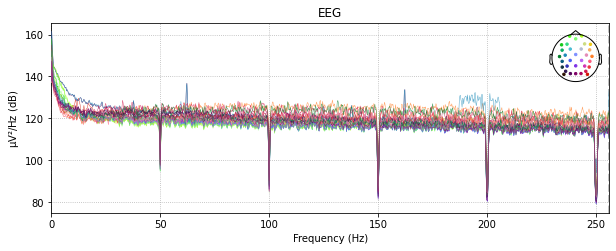

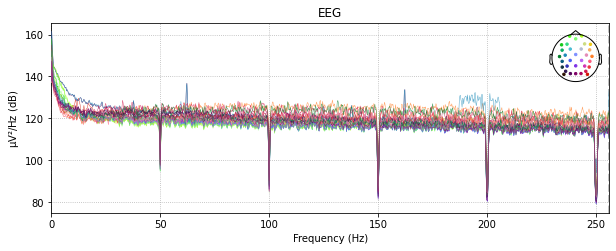

In [17]:
#Applies a zero-phase notch filter to the signal
#remove 50 Hz

raw.notch_filter(np.arange(50, 251, 50))
raw.plot_psd()

**Slow drift**

Low-frequency drifts in raw data can usually be spotted by plotting a fairly long span of data with the plot() method, though it is helpful to disable channel-wise DC shift correction to make slow drifts more readily visible. Here we plot 300 seconds (since we perform a 5 minutes experiment), showing all the eeg channels:

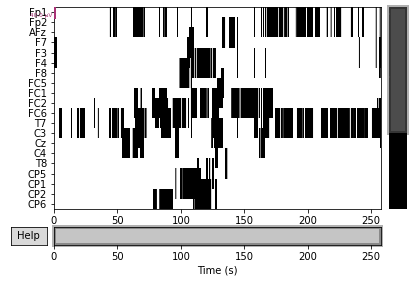

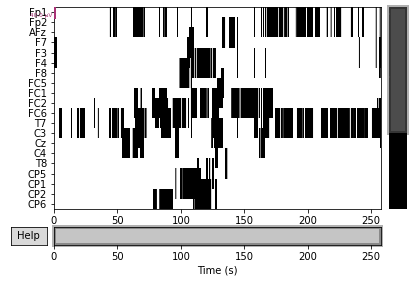

In [18]:
eeg_channels = mne.pick_types(raw.info, eeg=True)
raw.plot(duration=300, order=eeg_channels)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 16897 samples (33.002 sec)



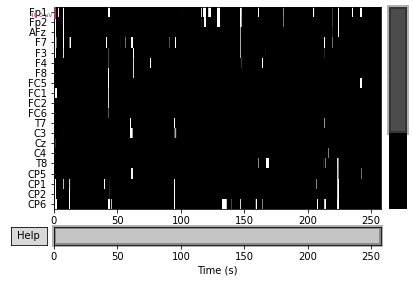

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 8449 samples (16.502 sec)



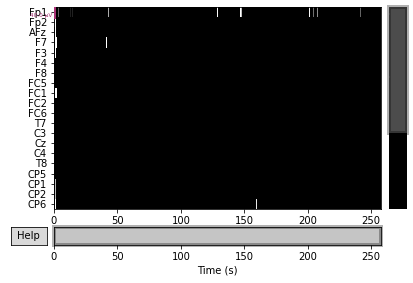

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 sec)



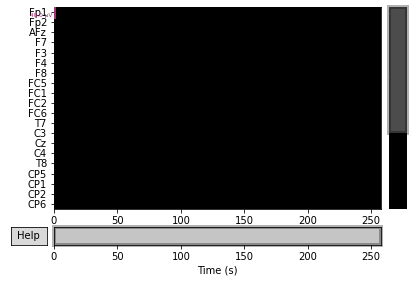

In [19]:
#Notice that there are a lot of vertical black lines. Those are drifts.
#We can usually remove using low frequency high pass filter. 
#Here let's try 0.1, 0.2 and 1 Hz.

for cutoff in (0.1, 0.2, 1):
    raw_highpass = raw.copy().filter(l_freq=cutoff, h_freq=None)
    fig = raw_highpass.plot(duration=300, order=eeg_channels)
    fig.subplots_adjust(top=0.9)
    fig.suptitle('High-pass filtered at {} Hz'.format(cutoff), size='xx-large',
                 weight='bold')

Looks like 1Hz was quite quite good to fully remove the slow drifts. Usually, 1Hz is a good measure since most of the brain frequency lies around 1 to 24Hz. Given that, we shall filter our brain signal to 1 to 24Hz.

Effective window size : 4.000 (s)


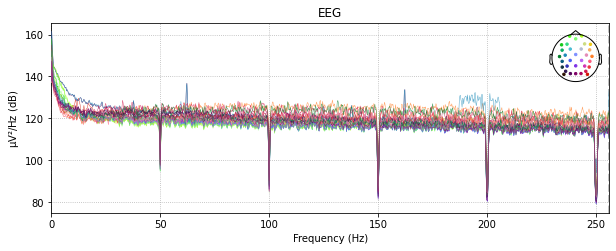

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 24 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 24.00 Hz: -6.02, -6.02 dB

Effective window size : 4.000 (s)


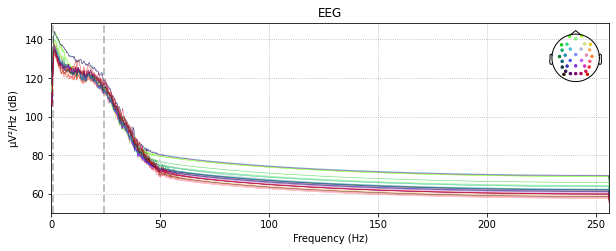

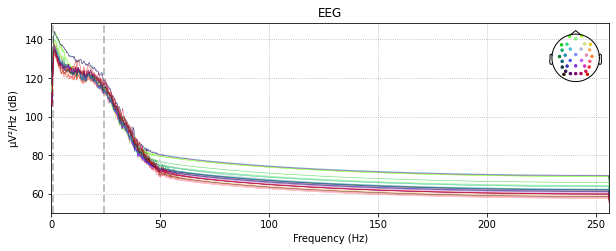

In [20]:
#we shall filter our brain signal to 1 to 24Hz
raw.plot_psd()
raw.filter(1,24,method = 'iir')
raw.plot_psd()

**PCA**

In [28]:
raw1 = raw.to_data_frame()
#raw1.tail()
X1 = raw1.drop(['time'],axis = 1)
X = X1.drop(['STI 014'],axis = 1)
print("X.values: \n",X.values)
print("X1 columns: \n",X.columns)
y = raw1['STI 014']

X.values: 
 [[ 3.17672004e+04  3.33016030e+04  3.34264843e+04 ... -7.68890922e+03
   1.58752240e+04 -5.13766589e+02]
 [ 6.33748750e+05  2.06994660e+06  1.67091030e+06 ...  3.28579734e+06
   5.19554408e+05  4.57754138e+06]
 [ 1.34022758e+06  4.16836597e+06  3.31775606e+06 ...  6.45767259e+06
   9.68391254e+05  9.03260554e+06]
 ...
 [ 4.53703336e+05 -1.55544621e+06  9.46896675e+05 ... -1.21221980e+06
   2.63105624e+06  3.62252112e+06]
 [ 1.93893706e+05 -8.14355045e+05  4.55543245e+05 ... -6.06370363e+05
   1.31044703e+06  1.85576270e+06]
 [-6.97949997e+04 -5.77519295e+04 -7.24720197e+04 ... -2.55759324e+03
  -1.78109176e+04 -3.88430281e+03]]
X1 columns: 
 Index(['Fp1', 'Fp2', 'AFz', 'F7', 'F3', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
       'T7', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3',
       'Pz', 'P4', 'P8', 'PO7', 'O1', 'Oz', 'O2', 'PO8', 'PO9', 'PO10'],
      dtype='object')


In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=32)  #Number of components to keep. if n_components is not set all components are kept

X_r = pca.fit(X.values).transform(X.values)
print("X_r: \n",X_r)

y1 = y.values.reshape(-1,1)
print("y1: \n",y1.shape)

data = np.hstack((X_r,y1))
print("Data: \n",data)

df = pd.DataFrame(data, columns = list(X1.columns))

X_r: 
 [[ 2.86028273e+04 -1.59569547e+05 -2.03616807e+04 ... -4.20226113e+03
   2.86846036e+03 -1.06508634e+04]
 [ 2.55508815e+07  2.26549318e+07 -2.30370897e+06 ... -3.58789229e+05
   8.73605114e+04  4.11206456e+05]
 [ 5.02107287e+07  4.44141417e+07 -4.40673067e+06 ... -6.94309669e+05
   1.68323673e+05  8.20916665e+05]
 ...
 [ 1.06686425e+08  2.02674641e+08  1.85212233e+07 ... -7.04890756e+05
  -1.94075642e+06  2.57154577e+05]
 [ 5.42990189e+07  1.03224035e+08  9.34790199e+06 ... -3.40525234e+05
  -9.91882977e+05  1.40247705e+05]
 [-3.66360525e+05 -4.22286436e+05 -2.19116902e+05 ...  3.25162600e+04
  -7.52226727e+03  1.38099652e+04]]
y1: 
 (132160, 1)
Data: 
 [[ 2.86028273e+04 -1.59569547e+05 -2.03616807e+04 ...  2.86846036e+03
  -1.06508634e+04  0.00000000e+00]
 [ 2.55508815e+07  2.26549318e+07 -2.30370897e+06 ...  8.73605114e+04
   4.11206456e+05  0.00000000e+00]
 [ 5.02107287e+07  4.44141417e+07 -4.40673067e+06 ...  1.68323673e+05
   8.20916665e+05  0.00000000e+00]
 ...
 [ 1.066864

Creating RawArray with float64 data, n_channels=33, n_times=132160
    Range : 0 ... 132159 =      0.000 ...   258.123 secs
Ready.
Effective window size : 4.000 (s)


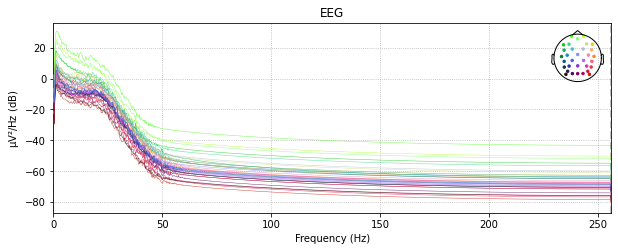

In [31]:
#PCA
raw = df_to_raw(df)

**Epoching**

Epoching is a process of extracting only the relevant EEG data when the event happens. Here we shall extract 0.0 seconds before the event starts until 0.5 seconds after the event starts. Here we choose 0.5 seconds because we knew that our stimuli stay on for 0.5 seconds after the event starts.

In [39]:
from mne import Epochs, find_events

def getEpochs(raw, event_id, tmin, tmax, picks):

    #epoching
    events = find_events(raw)
    
    #reject_criteria = dict(mag=4000e-15,     # 4000 fT
    #                       grad=4000e-13,    # 4000 fT/cm
    #                       eeg=100e-6,       # 150 μV
    #                       eog=250e-6)       # 250 μV

    reject_criteria = dict(eeg=100e-6)  #most voltage in this range is not brain components

    epochs = Epochs(raw, events=events, event_id=event_id, 
                    tmin=tmin, tmax=tmax, baseline=None, preload=True,verbose=False, picks=picks)  #8 channels
    print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)

    return epochs

In [41]:
event_id = {'NonTarget': 1, 'Target': 2}
tmin = 0.0 #0
tmax = 0.5 #0.5 seconds
picks= eeg_channels
epochs = getEpochs(raw,event_id, tmin, tmax, picks)

360 events found
Event IDs: [1 2]
sample drop %:  0.0


In [42]:
X = epochs.get_data()
y = epochs.events[:, -1]

print("X shape: ",X.shape)
print("y shape: ", y.shape)

X shape:  (360, 32, 257)
y shape:  (360,)


# Define model: Conv2D

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F